In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier



# Random forests

In [2]:
from util.functions import impute_and_train

model = RandomForestClassifier()

results = impute_and_train(model)

    

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 

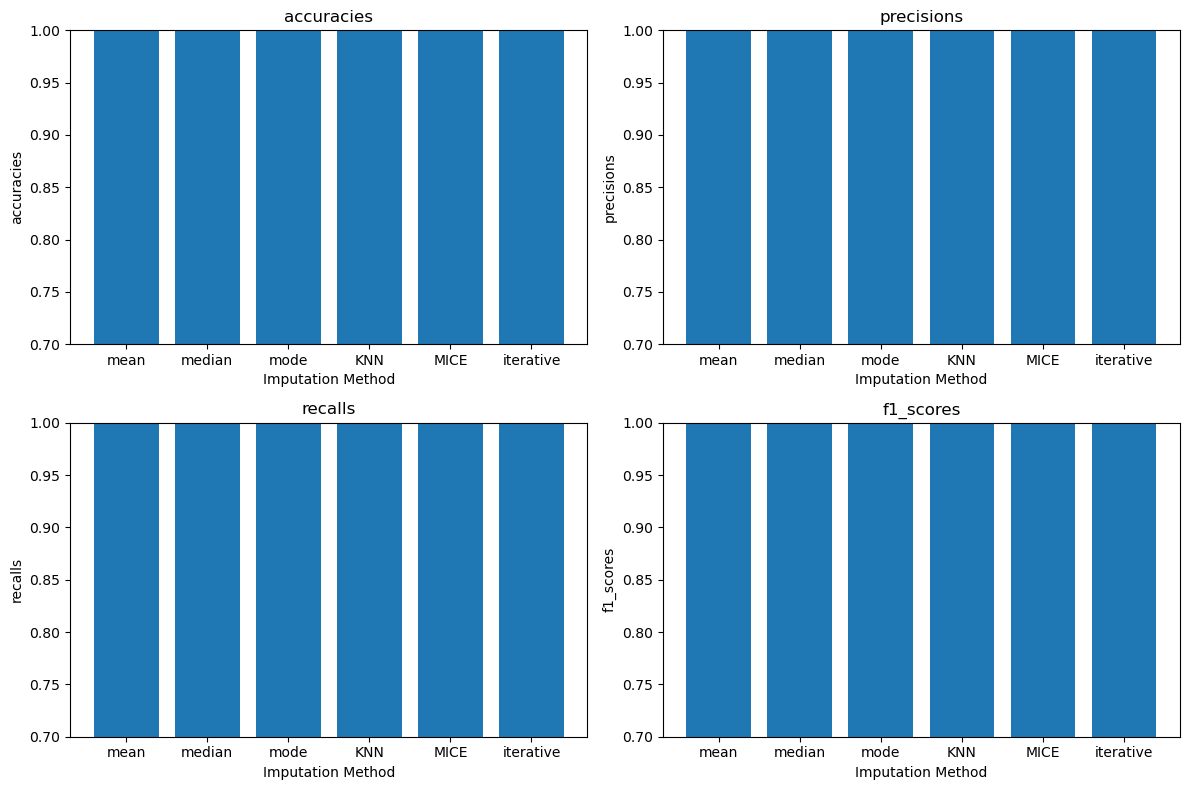

In [3]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])
    

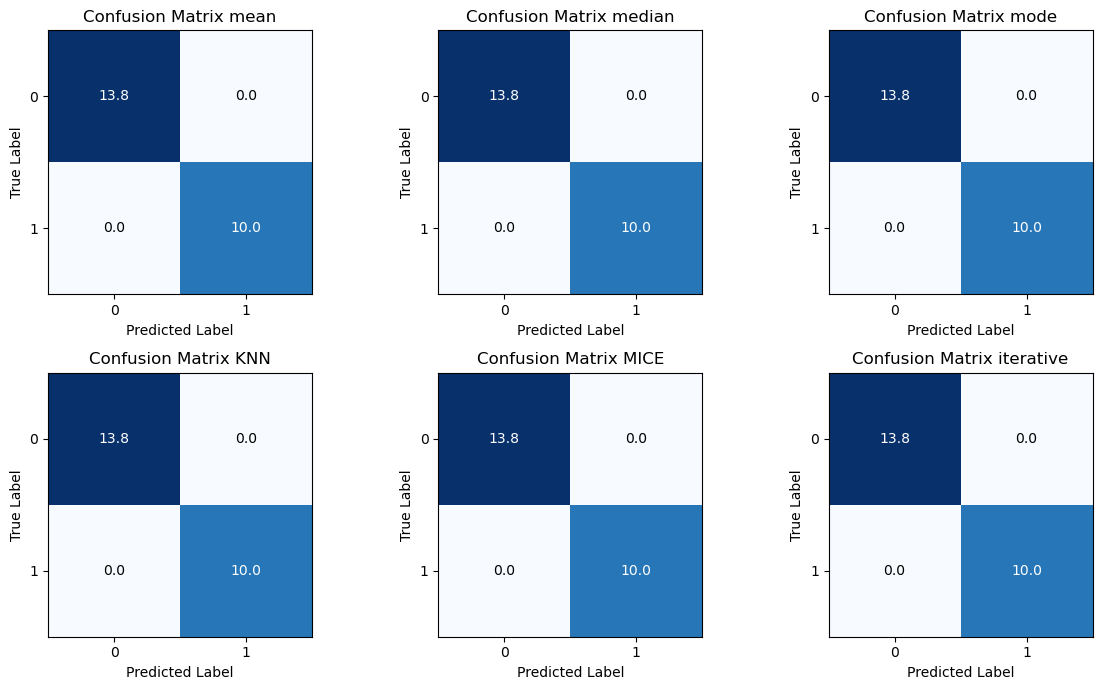

In [4]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

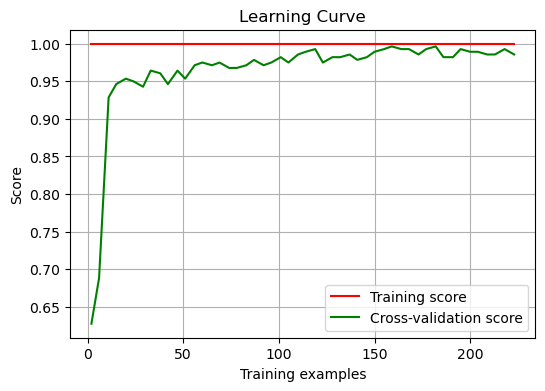

In [5]:
from util.functions import plot_learning_curve
plot_learning_curve(results['learning_curve'])

In [6]:
from util.functions import plot_feature_importances
# plot all feature importances as subplots
feature_importances = {}
for (name, model) in results['models'].items():
    feature_importances[name] = pd.DataFrame(
        model.feature_importances_, index=dataframes['mean'].drop(columns=['class']).columns, columns=['Importance'])

plot_feature_importances(feature_importances)

AttributeError: 'list' object has no attribute 'feature_importances_'